In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def styled_dataframe(df):
    """
    Apply styling to a DataFrame for better visual aesthetics.

    Parameters:
    - df: pd.DataFrame
        The DataFrame to style.

    Returns:
    - pd.DataFrame
        The styled DataFrame.
    """
    styled_df = df.style \
        .set_properties(**{'text-align': 'center'}) \
        .set_table_styles([{
            'selector': 'th',
            'props': [('font-size', '14px')]
        }, {
            'selector': 'td',
            'props': [('font-size', '12px')]
        }]) \
        .background_gradient(cmap='coolwarm', subset=df.select_dtypes('number').columns) \
        .applymap(lambda x: 'background-color: lightgray', subset=pd.IndexSlice[:, df.columns[df.isnull().any()]]) \
    
    return styled_df

In [3]:
def display_dataframe(df, title="DataFrame Preview", head_rows=5, sample_rows=5, tail_rows=5):
    """
    Display the head, sample, and tail of a DataFrame with good visual aesthetics.

    Parameters:
    - df: pd.DataFrame
        The DataFrame to display.
    - title: str, optional
        Title to display above the DataFrame. Default is "DataFrame Preview".
    - head_rows: int, optional
        Number of rows to display from the head of the DataFrame. Default is 5.
    - sample_rows: int, optional
        Number of random rows to display as a sample from the DataFrame. Default is 5.
    - tail_rows: int, optional
        Number of rows to display from the tail of the DataFrame. Default is 5.

    Returns:
    - None
    """
    print(f"\033[1m{title}\033[0m")
    
    # Display the head of the DataFrame
    styled_dataframe(df.head(head_rows))
    
    # Display a random sample from the DataFrame
    if sample_rows > 0:
        sample_df = df.sample(min(sample_rows, len(df)))
        print("\n\033[1mSample Data\033[0m")
        styled_dataframe(sample_df)
    
    # Display the tail of the DataFrame
    styled_dataframe(df.tail(tail_rows))

In [23]:
def demonstrate_display_dataframe():
    """
    Demonstrates the display_dataframe function.

    Parameters:
        None

    Returns:
        None
    """
    # Create a sample DataFrame (replace with your own data)
    data = {'A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            'B': ['Apple', 'Banana', 'Cherry', 'Date', 'Fig', 'Grape', 'Honeydew', 'Kiwi', 'Lemon', 'Mango'],
            'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
    df = pd.DataFrame(data)

    # Display the DataFrame with different settings
    display_dataframe(df, title="Sample DataFrame - Default Settings")

    display_dataframe(df, title="Sample DataFrame - Custom Settings",
                      head_rows=3, sample_rows=3, tail_rows=2)

In [24]:
demonstrate_display_dataframe()

Sample DataFrame - Default Settings


,A,B,C
0,1,Apple,0.1
1,2,Banana,0.2
2,3,Cherry,0.3
3,4,Date,0.4
4,5,Fig,0.5



Sample Data


,A,B,C
6,7,Honeydew,0.7
2,3,Cherry,0.3
3,4,Date,0.4
8,9,Lemon,0.9
7,8,Kiwi,0.8


,A,B,C
5,6,Grape,0.6
6,7,Honeydew,0.7
7,8,Kiwi,0.8
8,9,Lemon,0.9
9,10,Mango,1.0


Sample DataFrame - Custom Settings


,A,B,C
0,1,Apple,0.1
1,2,Banana,0.2
2,3,Cherry,0.3



Sample Data


,A,B,C
2,3,Cherry,0.3
8,9,Lemon,0.9
6,7,Honeydew,0.7


,A,B,C
8,9,Lemon,0.9
9,10,Mango,1.0


In [22]:
def dataframe_summary(df):
    """
    Perform basic exploratory data analysis (EDA) on a Pandas DataFrame.

    Parameters:
    df (DataFrame): The DataFrame to analyze.

    Returns:
    dict: A dictionary containing various EDA statistics and information.
    """
    # Summary statistics
    summary_stats = df.describe()

    # Data types and missing values
    data_info = df.info()

    # Number of unique values in each column
    num_unique = df.nunique()

    # Check for missing values
    missing_values = df.isnull().sum()

    # Check for duplicated rows
    num_duplicates = df.duplicated().sum()

    # Basic histogram for numeric columns
    numeric_columns = df.select_dtypes(include=['number'])
    histograms = {}
    for column in numeric_columns.columns:
        histograms[column] = df[column].plot(kind='hist', title=column)
    
    # Create a dictionary to store the EDA results
    eda_results = {
        'Summary Statistics': summary_stats,
        'Data Types and Missing Values': data_info,
        'Number of Unique Values': num_unique,
        'Missing Values': missing_values,
        'Number of Duplicates': num_duplicates,
        'Histograms': histograms,
    }

    return eda_results

In [14]:
def demonstrate_dataframe_summary():
    """
    This function demonstrates the process of performing Exploratory Data Analysis (EDA) on a DataFrame.

    Parameters:
        None

    Returns:
        None
    """
    # Create a sample DataFrame (replace with your own data)
    data = {'A': [1, 2, 3, 4, 5],
            'B': [10.1, 20.2, 30.3, 40.4, 50.5],
            'C': ['X', 'Y', 'Z', 'X', 'Y']}
    df = pd.DataFrame(data)

    # Perform basic EDA
    eda_results = dataframe_summary(df)

    # Styling for visual aesthetics
    sns.set_style("whitegrid")
    plt.rcParams["figure.figsize"] = (10, 6)

    # Print the EDA results with improved visuals
    for key, value in eda_results.items():
        print(f"\033[1m===== {key} =====\033[0m")
        if isinstance(value, pd.DataFrame):
            # Style DataFrame for better visual aesthetics
            styled_df = styled_dataframe(value)
            display(styled_df)
        elif isinstance(value, dict):
            for subkey, subvalue in value.items():
                if isinstance(subvalue, plt.Axes):
                    subvalue.set_title(subkey)  # Set titles for subplots
                    plt.show()  # Display subplots
        else:
            print(value)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       5 non-null      int64  
 1   B       5 non-null      float64
 2   C       5 non-null      object 
dtypes: float64(1), int64(1), object(1)
memory usage: 248.0+ bytes
===== Summary Statistics =====


,A,B
count,5.000000,5.000000
mean,3.000000,30.300000
std,1.581139,15.969502
min,1.000000,10.100000
25%,2.000000,20.200000
50%,3.000000,30.300000
75%,4.000000,40.400000
max,5.000000,50.500000


===== Data Types and Missing Values =====
None
===== Number of Unique Values =====
A    5
B    5
C    3
dtype: int64
===== Missing Values =====
A    0
B    0
C    0
dtype: int64
===== Number of Duplicates =====
0
===== Histograms =====


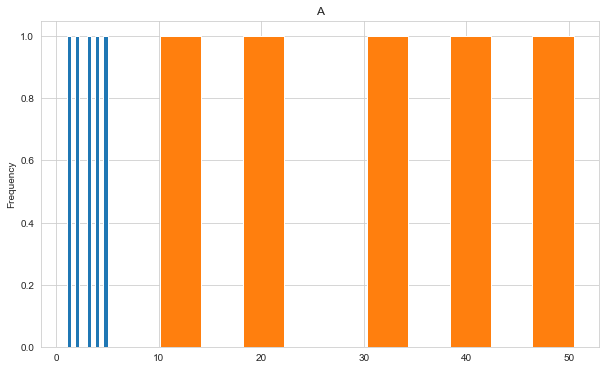

In [9]:
 demonstrate_dataframe_summary()

In [17]:
def handle_missing_values(df, strategy='auto', default_value=None, threshold=5, row_threshold=None, column_threshold=None):
    """
    Handle missing values in a DataFrame using different strategies.

    Parameters:
    - df: pd.DataFrame
        The DataFrame to perform missing value treatment on.
    - strategy: str, optional
        The missing value handling strategy. Options: 'auto', 'fill', 'impute', 'drop'.
        Default is 'auto'.
    - default_value: any, optional
        The default value to fill missing values with when strategy is 'fill'.
        Default is None.
    - threshold: int, optional
        The threshold difference between mean and median for choosing the imputation method (mean or median).
        Default is 5.
    - row_threshold: int, optional
        Maximum number of missing values allowed in a row before dropping it (for 'auto' and 'drop' strategies).
        Default is None (no row dropping).
    - column_threshold: int, optional
        Maximum number of missing values allowed in a column before dropping it (for 'auto' and 'drop' strategies).
        Default is None (no column dropping).

    Returns:
    - pd.DataFrame
        The DataFrame with missing values handled based on the specified strategy.
    """
    df_processed = df.copy()

    # Automatically identify numeric and categorical columns
    numeric_columns = df.select_dtypes(include=['number']).columns
    categorical_columns = df.select_dtypes(exclude=['number']).columns
    
    if strategy == 'auto':
        for column in numeric_columns:
            if df[column].isnull().sum() > 0:
                if abs(df[column].mean() - df[column].median()) <= threshold:
                    df_processed[column].fillna(df[column].mean(), inplace=True)
                else:
                    df_processed[column].fillna(df[column].median(), inplace=True)
        
        for column in categorical_columns:
            if df[column].isnull().sum() > 0:
                df_processed[column].fillna(df[column].mode()[0], inplace=True)  # Fill with mode for categorical columns
    
    elif strategy == 'fill' and default_value is not None:
        df_processed.fillna(default_value, inplace=True)
    
    elif strategy == 'impute':
        for column in numeric_columns:
            if df[column].isnull().sum() > 0:
                if abs(df[column].mean() - df[column].median()) <= threshold:
                    df_processed[column].fillna(df[column].mean(), inplace=True)
                else:
                    df_processed[column].fillna(df[column].median(), inplace=True)
        
        for column in categorical_columns:
            if df[column].isnull().sum() > 0:
                df_processed[column].fillna(df[column].mode()[0], inplace=True)
                
    elif strategy == 'drop':
        if row_threshold is not None and column_threshold is not None:
            # Scenario 1: Drop rows and columns based on both row_threshold and column_threshold

            # Calculate the total number of missing values in each row and column
            row_missing_counts = df_processed.isnull().sum(axis=1)
            column_missing_counts = df_processed.isnull().sum(axis=0)

            # Drop rows exceeding the row_threshold
            rows_to_drop = row_missing_counts[row_missing_counts >= row_threshold].index
            df_processed.drop(index=rows_to_drop, inplace=True)

            # Drop columns exceeding the column_threshold
            columns_to_drop = column_missing_counts[column_missing_counts >= column_threshold].index
            df_processed.drop(columns=columns_to_drop, inplace=True)

        elif row_threshold is not None:
            # Scenario 2: Drop rows based on row_threshold

            # Calculate the total number of missing values in each row
            row_missing_counts = df_processed.isnull().sum(axis=1)

            # Drop rows exceeding the row_threshold
            rows_to_drop = row_missing_counts[row_missing_counts >= row_threshold].index
            df_processed.drop(index=rows_to_drop, inplace=True)

        elif column_threshold is not None:
            # Scenario 3: Drop columns based on column_threshold

            # Calculate the total number of missing values in each column
            column_missing_counts = df_processed.isnull().sum(axis=0)

            # Drop columns exceeding the column_threshold
            columns_to_drop = column_missing_counts[column_missing_counts >= column_threshold].index
            df_processed.drop(columns=columns_to_drop, inplace=True)

        else:
            # Scenario 4: Drop all rows with any missing values (default behavior)

            df_processed.dropna(axis=0, inplace=True)

    return df_processed

In [20]:
def demonstrate_handle_missing_values():
    """
    This function demonstrates how to handle missing values in a DataFrame using different strategies.

    Parameters:
        None

    Returns:
        None
    """
    # Create a sample DataFrame (replace with your own data)
    data = {'A': [1, 2, np.nan, 4, 5],
            'B': [10.1, np.nan, 30.3, 40.4, 50.5],
            'C': ['X', 'Y', 'Z', 'X', 'Y']}
    df = pd.DataFrame(data)

    # Print the original DataFrame
    print("===== Original DataFrame =====")
    styled_df = styled_dataframe(df)
    display(styled_df)

    # Handle missing values using different strategies
    strategies = ['auto', 'fill', 'impute', 'drop']
    for strategy in strategies:
        print(f"===== Handling Missing Values - Strategy: {strategy} =====")
        if strategy != 'fill':
            df_processed = handle_missing_values(df, strategy=strategy)
        else:
            df_processed = handle_missing_values(df, strategy=strategy, default_value=0.0)
        styled_processed_df = styled_dataframe(df_processed)
        display(styled_processed_df)

In [21]:
from IPython.display import display
demonstrate_handle_missing_values()

===== Original DataFrame =====


,A,B,C
0,1.000000,10.100000,X
1,2.000000,nan,Y
2,nan,30.300000,Z
3,4.000000,40.400000,X
4,5.000000,50.500000,Y


===== Handling Missing Values - Strategy: auto =====


,A,B,C
0,1.000000,10.100000,X
1,2.000000,32.825000,Y
2,3.000000,30.300000,Z
3,4.000000,40.400000,X
4,5.000000,50.500000,Y


===== Handling Missing Values - Strategy: fill =====


,A,B,C
0,1.000000,10.100000,X
1,2.000000,0.000000,Y
2,0.000000,30.300000,Z
3,4.000000,40.400000,X
4,5.000000,50.500000,Y


===== Handling Missing Values - Strategy: impute =====


,A,B,C
0,1.000000,10.100000,X
1,2.000000,32.825000,Y
2,3.000000,30.300000,Z
3,4.000000,40.400000,X
4,5.000000,50.500000,Y


===== Handling Missing Values - Strategy: drop =====


,A,B,C
0,1.000000,10.100000,X
3,4.000000,40.400000,X
4,5.000000,50.500000,Y
